# 13. Colecciones de Python

Anteriormente revisamos las estructuras básicas de python: ```list, dict, set, tuple```. En este notebook veremos las siguientes: ```counter```, ```deque```, ```ordered dictionary```, ```default dictionary``` and ```named tuple```.

## Counter 

Es un contenedor que sirve para guardar la frecuencia de valores determinados.

In [6]:
from collections import Counter 

lista = ['a', 'b', 'c', 'a', 'a', 'a', 'a', 'b', 'b', 'c', 'c', 'c']
c = Counter(lista)
print(c)


Counter({'a': 5, 'c': 4, 'b': 3})


In [13]:
from collections import Counter 

cad = 'you have no power here'
c = Counter(cad)
print(c)

Counter({' ': 4, 'e': 4, 'o': 3, 'h': 2, 'r': 2, 'y': 1, 'u': 1, 'a': 1, 'v': 1, 'n': 1, 'p': 1, 'w': 1})


Es posible actualizar los valores de un Counter con update:

In [14]:
cad2 = 'you have no power here'
c.update(cad2)
print(c)

Counter({' ': 8, 'e': 8, 'o': 6, 'h': 4, 'r': 4, 'y': 2, 'u': 2, 'a': 2, 'v': 2, 'n': 2, 'p': 2, 'w': 2})


## Ejercicio:

¿Cuántas veces aparece cada nombre de una lista dada?


In [18]:
from collections import Counter

lista = ['David','John','Paul','Mark','James','Andrew','Scott','Steven','Robert','Stephen','David','John','Paul','Mark','David','John','Paul','Mark','James','Andrew','Scott','Steven','James','Andrew','Scott','Steven']

c = Counter(lista)
print(c)

Counter({'David': 3, 'John': 3, 'Paul': 3, 'Mark': 3, 'James': 3, 'Andrew': 3, 'Scott': 3, 'Steven': 3, 'Robert': 1, 'Stephen': 1})


Para obtener los primeros n valores más populares se puede utilizar ```most_common(n)```

In [20]:
c.most_common(3)

[('David', 3), ('John', 3), ('Paul', 3)]

Es posible sumar, restar, intersectar y unir contadores. La operación estará definida en términos de conjuntos:

In [23]:
from collections import Counter

lista1 = ['David', 'James', 'James', 'James', 'James', 'David', 'Scott']
lista2 = ['David', 'Scott', 'David', 'Scott', 'Scott', 'Anna']

c = Counter(lista1)
c2 = Counter(lista2)

print(c)
print(c2)


Counter({'James': 4, 'David': 2, 'Scott': 1})
Counter({'Scott': 3, 'David': 2, 'Anna': 1})


In [26]:
s = c-c2
print('sum = ' + str(s))

sum = Counter({'James': 4})


In [27]:
s = c+c2
print('sum = ' + str(s))

sum = Counter({'David': 4, 'James': 4, 'Scott': 4, 'Anna': 1})


In [29]:
s = c | c2
print('Union = ' + str(s))

Union = Counter({'James': 4, 'Scott': 3, 'David': 2, 'Anna': 1})


In [31]:
s = c2 & c
print('Intersection = ' + str(s))

Intersection = Counter({'David': 2, 'Scott': 1})


## Deque

Es una bicola. Puede visualizarse como un tubo abierto en ambos sentidos. 

Permite agregar o eliminar elementos en cada uno de los dos extremos. 

In [49]:
from collections import deque

deck = deque()
deck.append(1)
deck.append(2)
deck.extend([3, 4])
deck.appendleft(10)
deck.appendleft(20)
deck.extendleft([1000, 2000])

print(deck)

deque([2000, 1000, 20, 10, 1, 2, 3, 4])


Para eliminar se utiliza ```pop()``` o ```popleft()```:


In [50]:
print(deck)
deck.pop()
print(deck)
deck.pop()
print(deck)

deque([2000, 1000, 20, 10, 1, 2, 3, 4])
deque([2000, 1000, 20, 10, 1, 2, 3])
deque([2000, 1000, 20, 10, 1, 2])


In [51]:
print(deck)
deck.popleft()
print(deck)
deck.popleft()
print(deck)

deque([2000, 1000, 20, 10, 1, 2])
deque([1000, 20, 10, 1, 2])
deque([20, 10, 1, 2])


Es posible rotar un deque en cada extremo utilizando el método ```rotate(n)```. 

- Si n es positivo, se rotará de izquierda a derecha
- Si n es negativo, se rotará de derecha a izquierda

In [57]:
from collections import deque

deck = deque(range(6))
print(deck)
deck.rotate(2)
print("rotación a la derecha:" + str(deck))
deck.rotate(-2)
print("rotación a la izquierda:" + str(deck))

deque([0, 1, 2, 3, 4, 5])
rotación a la derecha:deque([4, 5, 0, 1, 2, 3])
rotación a la izquierda:deque([0, 1, 2, 3, 4, 5])


## Diccionarios ordenados

La clase ```OrderedDict``` es una subclase de la clase ```dict``` y recuerda el orden en el que se añadieron los elementos:


In [68]:
from collections import OrderedDict

print('Regular Dictionary')
d = {}
d['a']= 'SAS'
d['b']= 'PYTHON'
d['z']= 'R'
d['d']= 'C++'
d['c']= 'LUA'


for k,v in d.items():
    print (k, ":",v)

print ('\n Ordered dictionary')

d1 = OrderedDict()
d1['a']= 'SAS'
d1['b']= 'PYTHON'
d1['c']= 'R'
d1['d']= 'C++'
d1['c']= 'LUA'

for k,v in d1.items():
    print (k, ":",v)

Regular Dictionary
a : SAS
b : PYTHON
z : LUA
d : C++

 Ordered dictionary
a : SAS
b : PYTHON
z : LUA
d : C++


Es posible almacenar los datos de forma ordenada así:


In [72]:
dict2 = OrderedDict(sorted(d1.items()))
print(dict2)

OrderedDict([('a', 'SAS'), ('b', 'PYTHON'), ('d', 'C++'), ('z', 'LUA')])


Para ordenar los por valor se puede usar una expresión lambda:

In [79]:
dict3 = OrderedDict(sorted(d1.items(), key = lambda i:i[1]))
print(dict3)

OrderedDict([('d', 'C++'), ('z', 'LUA'), ('b', 'PYTHON'), ('a', 'SAS')])


Una función lambda es una pequeña función anónima. Puede tomar cualquier número de argumentos pero puede únicamente tener una expresión.

In [80]:
x = lambda a : a + 10
print(x(5))

15


In [81]:
x = lambda a, b : a * b
print(x(5, 6))

30


Una aplicación a parte de las mostradas anteriormente puede ser para llamar código dentro de una función:

In [82]:
def myfunc(n):
  return lambda a : a * n

mydoubler = myfunc(2)

print(mydoubler(11))

22


## Default Dictionary

Permite crear un diccionario con valores por defecto de la siguiente forma:

In [86]:
from collections import defaultdict

def get_default():
        return "Fútbol"
    
game = defaultdict(get_default)
game["A"]= "Natación"
game["B"] = "Levantamiento de Pesas"

print (str(game))
print (game["A"])
print (game["B"])
print (game["C"])

defaultdict(<function get_default at 0x00000160DE3CEEA0>, {'A': 'Natación', 'B': 'Levantamiento de Pesas'})
Natación
Levantamiento de Pesas
Futbol


Con una función lambda quedaría así:

In [88]:
from collections import defaultdict
    
game = defaultdict(lambda:"Fútbol")
game["A"]= "Natación"
game["B"] = "Levantamiento de Pesas"

print (str(game))
print (game["A"])
print (game["B"])
print (game["C"])

defaultdict(<function <lambda> at 0x00000160DE40C048>, {'A': 'Natación', 'B': 'Levantamiento de Pesas'})
Natación
Levantamiento de Pesas
Fútbol


Con el valor por defecto de un tipo de dato:

In [96]:
from collections import defaultdict
    
game = defaultdict(int)
game["A"]= "Natación"
game["B"] = "Levantamiento de Pesas"

print (str(game))
print (game["A"])
print (game["B"])
print (game["C"])
print (str(game))

defaultdict(<class 'int'>, {'A': 'Natación', 'B': 'Levantamiento de Pesas'})
Natación
Levantamiento de Pesas
0
defaultdict(<class 'int'>, {'A': 'Natación', 'B': 'Levantamiento de Pesas', 'C': 0})


Esto puede ser aplicado para contar los elementos de una lista:

In [93]:
from collections import defaultdict

game = defaultdict(int)

list1 = ['cricket', 'badminton', 'hockey' 'rugby', 'golf', 'baseball' ,
'football']

for each in list1:
    game[each]= game[each]+1
print(game)

defaultdict(<class 'int'>, {'cricket': 1, 'badminton': 1, 'hockeyrugby': 1, 'golf': 1, 'baseball': 1, 'football': 1})


O para inicializar capitales como una lista a partir de una tupla de paises y capitales:

In [95]:
from collections import defaultdict
game = defaultdict(list)

tuple_list_county = [('US', 'Visconsin'), ('Germany', 'Bavaria'), ('UK','Bradfordshire'), 
                     ('India', 'punjab'), ('China', 'Shandong'), ('Canada','Nova Scotia')]

print (game["any_value"])

for k,v in tuple_list_county:
    game[k].append(v)

print(game)

[]
defaultdict(<class 'list'>, {'any_value': [], 'US': ['Visconsin'], 'Germany': ['Bavaria'], 'UK': ['Bradfordshire'], 'India': ['punjab'], 'China': ['Shandong'], 'Canada': ['Nova Scotia']})


## Tupla nombrada:

Se pueden asignar nombres a partes de una tupla así:
    
```namedtuple(typename, field_names[, verbose=False][,rename=False])```

Donde:

- ```typename``` define el nombre del nuevo tipo de dato.
- ```field_names``` Pueden ser una secuencia de strings tales como ['x', 'y'] ó un string de palabras separadas en blanco.
- con rename en falso los valores inválidos se reemplazan con posiciones 'def, emp, edad' es cambiado a '_0, age, empid' porque def es una palabra reservada.


In [106]:
import collections

empleado = collections.namedtuple('empl','nombre, edad, codigo')
registro = empleado("Perez", 28, 12365 )

print ("Record is ", registro)
print ("nombre: ", registro.nombre)
print ("edad: ", registro.edad)
print ("código ", registro.codigo)
print ("type is ", type(record1))

Record is  empl(nombre='Perez', edad=28, codigo=12365)
nombre:  Perez
edad:  28
código  12365
type is  <class '__main__.empl'>


Se puede combinar con las demás estructuras de datos:

In [108]:
import collections

empleado = collections.namedtuple('empl','nombre, edad, codigo')
ldatos = ['BOB', 21, 34567
         ]
record2 =empleado._make(ldatos)

print(record2)
print("n")
print(record2._asdict())

empl(nombre='BOB', edad=21, codigo=34567)
n
OrderedDict([('nombre', 'BOB'), ('edad', 21), ('codigo', 34567)])


Como los valores de una tupla son inmutables las tuplas nombradas son inmutables. Se puede utilizar ```_replace``` para cambiar el valor de una tupla nombrada.

In [116]:
import collections

empleado = collections.namedtuple('empl','nombre, edad, codigo')
record1 = empleado("Marina", 28, 12365 )

print (record1)
record1 = record1._replace(edad = 22)
print (record1)
record1 = record1._replace(edad= 25)
print (record1)

empl(nombre='Marina', edad=28, codigo=12365)
empl(nombre='Marina', edad=22, codigo=12365)
empl(nombre='Marina', edad=25, codigo=12365)


# Referencias

https://www.w3schools.com/python/python_lambda.asp

Das, B. N. (2017). Learn Python in 7 Days. Packt Publishing Ltd.

# Los nombres del bebé

In [11]:
from collections import Counter 
bebe = str(input())
bebe2 = bebe.split(",")
c = Counter(bebe2)
c = c.most_common(3)

for i in range(0, len(c)):
    print(i+1,'.',c[i][0],'(',c[i][1],'votos)')

 David,John,Paul,Mark,James,David,David,James,John,Paul,Paul,Paul
1 . Paul ( 4 votos)
2 . John ( 2 votos)
3 . James ( 2 votos)


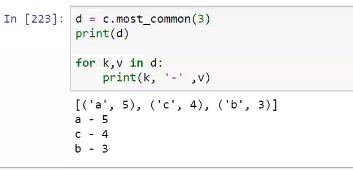


# Josefo revive

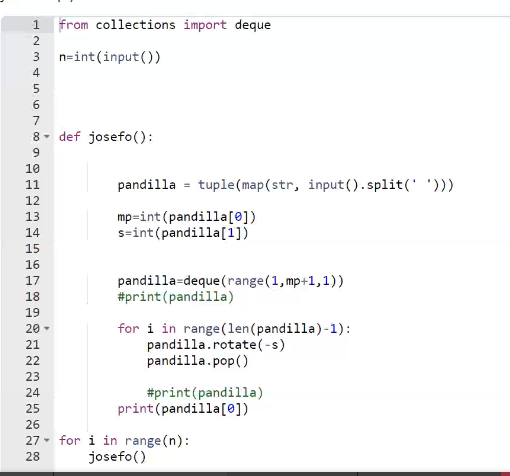

In [ ]:
from collections import deque

n = int(input())

def josefo():
    vidas = tuple(map(str, input().split(' ')))
    
    v = int(vidas[0])
    s = int(vidas[1])
    
    vidas = deque(range(1, v+1,1))
    
    for i in range(len(vidas)-1):
        vidas.rotate(-s)
        vidas.pop()
        
    print(vidas[0])
    
for i in range(n):
    josefo()